# Анализ статистики бронирований отелей

## 2. Аннотация

В современном мире путешествий крайне важно понимать некоторые статистические особенности отельного бизнеса. Данное исследование строит и проверяет гипотезы в этой сфере, которые могут помочь владельцам отелей принимать верные решения при управлении персоналом и построении бизнес-модели.

## 3. Введение

Задача, стоящая перед нами, заключается в формировании представления о трендах и зависимостях в сфере бронирования отелей на основе предоставленных данных. Данные представляют собой таблицу с аноноимизированной информацией о бронированиях отелей по 32 параметрам. В таблице представлено порядка 119 000 бронирований разных отелей в разное время, поэтому выборку можно считать достаточно обширной для выявления общих зависимостей в отельном бизнесе.

## 4. Подготовка данных

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statistics import mean

In [397]:
sns.set(rc={'figure.figsize':(15,9)}) # устанавливаем размер графиков и гистограмм
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font) # меняем шрифт

In [312]:
df = pd.read_csv('bookings.csv') # читаем базу данных из файла
df.head(1) # выводим первую строку для того, чтобы убедиться, что все в порядке

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


### обработка пустых и некорректных значений

In [475]:
df.count() # сколько полей в датафрейме

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [476]:
df.dropna().count() # сколько полей в датафрейме без пропусков

hotel                             217
is_canceled                       217
lead_time                         217
arrival_date_year                 217
arrival_date_month                217
arrival_date_week_number          217
arrival_date_day_of_month         217
stays_in_weekend_nights           217
stays_in_week_nights              217
adults                            217
children                          217
babies                            217
meal                              217
country                           217
market_segment                    217
distribution_channel              217
is_repeated_guest                 217
previous_cancellations            217
previous_bookings_not_canceled    217
reserved_room_type                217
assigned_room_type                217
booking_changes                   217
deposit_type                      217
agent                             217
company                           217
days_in_waiting_list              217
customer_typ

Из этого мы видим, что не можем позволить себе пренебречь строками с хотя бы одним пропуском

как можно заметить, большинство пропусков находятся в полях agent и company, которыми в рамках данного исследования можно принебречь

In [477]:
df = df.drop('agent',axis=1)
df = df.drop('company',axis=1)
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [478]:
df.dropna().count()

hotel                             118898
is_canceled                       118898
lead_time                         118898
arrival_date_year                 118898
arrival_date_month                118898
arrival_date_week_number          118898
arrival_date_day_of_month         118898
stays_in_weekend_nights           118898
stays_in_week_nights              118898
adults                            118898
children                          118898
babies                            118898
meal                              118898
country                           118898
market_segment                    118898
distribution_channel              118898
is_repeated_guest                 118898
previous_cancellations            118898
previous_bookings_not_canceled    118898
reserved_room_type                118898
assigned_room_type                118898
booking_changes                   118898
deposit_type                      118898
days_in_waiting_list              118898
customer_type   

теперь мы можем позволить себе удалить строки с пустыми значениями и потерять незначительное количество данных

In [479]:
df = df.dropna()

так же было замечено, что присутствует незначительное кол-во полей, в которых не числится число постояльцев:

In [488]:
df[df['adults']+df['children']+df['babies']==0].adults.count()

170

In [492]:
df = df.drop(df[df['adults']+df['children']+df['babies']==0].index, axis=0)

## 5. Разведочный анализ 

### Гипотеза 1: тип питания кореллирует с количеством детей

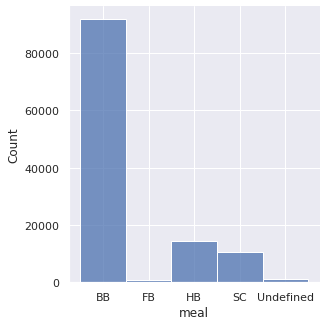

In [509]:
sns.displot(data=df , x='meal')

общая гистограмма популярности видов питания

<AxesSubplot:xlabel='meal', ylabel='babies'>

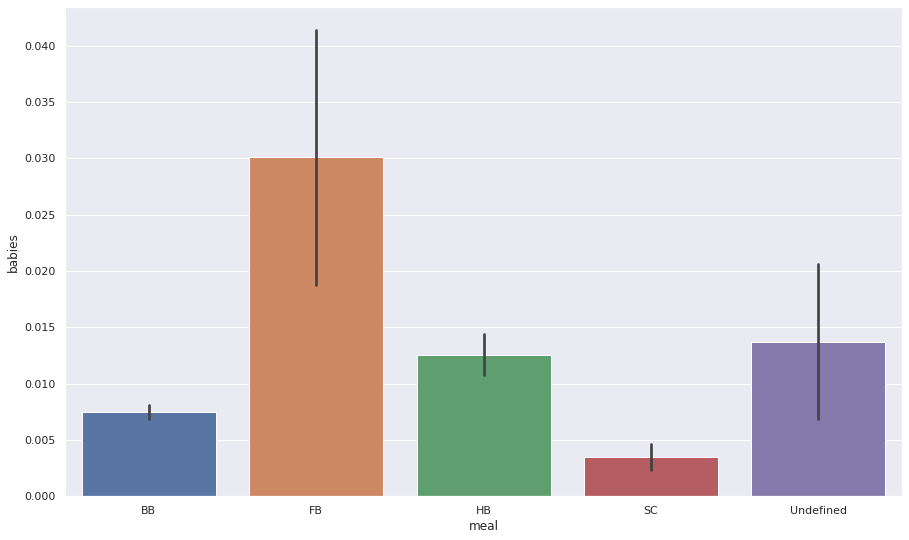

In [508]:
sns.barplot(x='meal', y='babies', data=df)

действительно, гости с маленькими детьми куда чаще выбирают FB - трехразовое питание

<AxesSubplot:xlabel='meal', ylabel='children'>

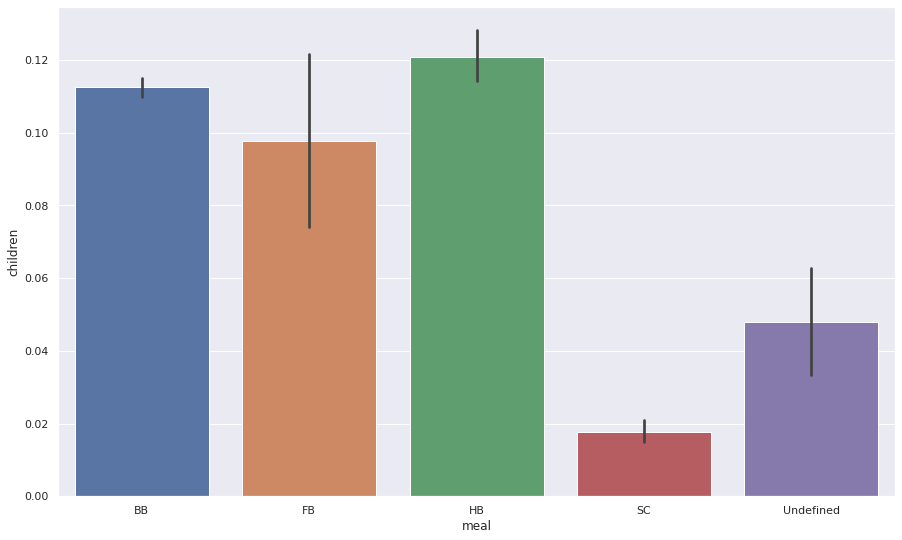

In [507]:
sns.barplot(x='meal', y='children', data=df)

а гости с детьми постарше реже выбирают только завтрак

### Гипотеза 2: пиковые сезоны летом

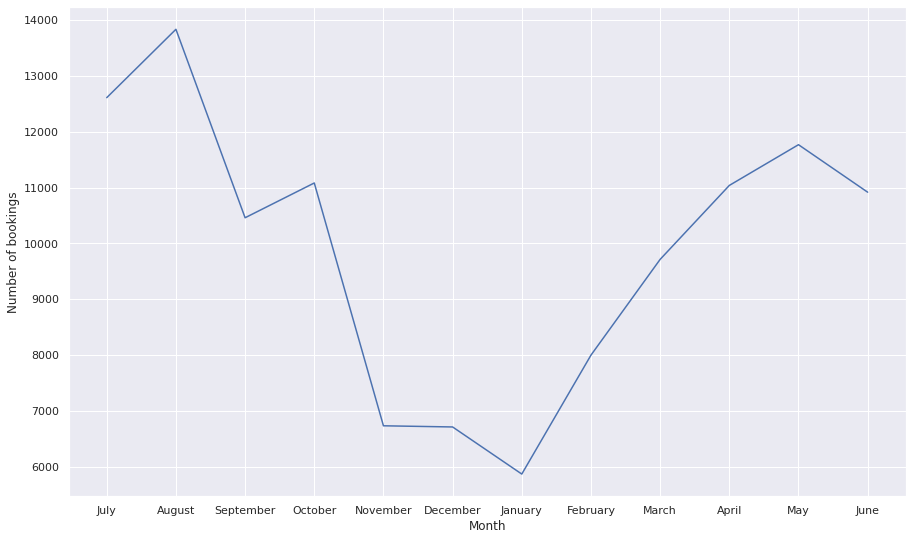

In [506]:
temp = df.arrival_date_month.unique() # список всех месяцев в таблице
arr = [df[df['arrival_date_month']==x].hotel.count() for x in temp] # список с подсчитанным количеством бронирований в определенный месяц


plt.ylabel("Number of bookings") # название вертикальной оси
plt.xlabel("Month") # название горизонтальной оси
plt.plot(temp, arr) # сроим график по спискам выше

действительно, больше всего бронирований приходятся на август

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

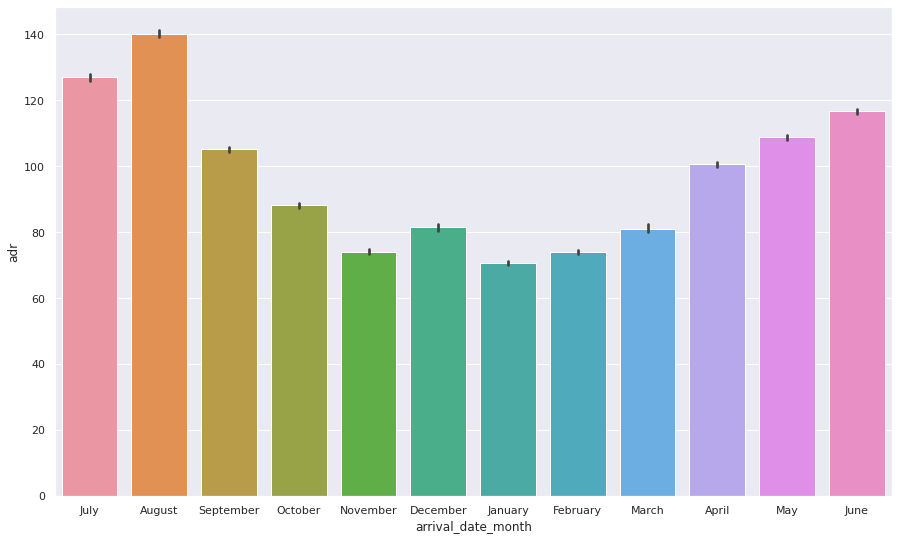

In [505]:
sns.barplot(x='arrival_date_month', y='adr', data=df)

Это так же подтверждается гистограммой, использующей adr

### Гипотеза 3: в среднем люди бронируют отели не менее чем за 2 месяца

In [197]:
print(df.lead_time.mean()/30)
print(df.lead_time.median()/30)

3.4770478337174158
2.3


(array([2.1431e+04, 9.1780e+03, 6.9310e+03, 6.7270e+03, 5.4800e+03,
        4.9500e+03, 4.6480e+03, 4.1290e+03, 3.9220e+03, 3.7160e+03,
        3.4340e+03, 3.3100e+03, 2.7120e+03, 2.7890e+03, 2.5620e+03,
        2.8410e+03, 2.6950e+03, 2.3580e+03, 2.2710e+03, 1.8830e+03,
        1.5540e+03, 1.8600e+03, 1.3870e+03, 1.1190e+03, 1.1770e+03,
        1.1550e+03, 1.0840e+03, 1.5680e+03, 1.0300e+03, 8.4900e+02,
        1.1010e+03, 8.9400e+02, 7.5200e+02, 7.6900e+02, 5.3900e+02,
        4.8100e+02, 3.6300e+02, 2.7700e+02, 3.3800e+02, 3.5000e+02,
        2.0300e+02, 2.6300e+02, 2.4200e+02, 1.1900e+02, 1.7000e+02,
        1.9900e+02, 2.5700e+02, 1.1000e+02, 3.4000e+01, 3.6000e+01,
        5.3000e+01, 6.0000e+01, 2.7000e+01, 3.5000e+01, 4.0000e+01,
        3.4000e+01, 1.7000e+01, 1.7000e+01, 3.4000e+01, 1.7000e+01,
        6.4000e+01, 1.7000e+01, 6.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00]),
 a

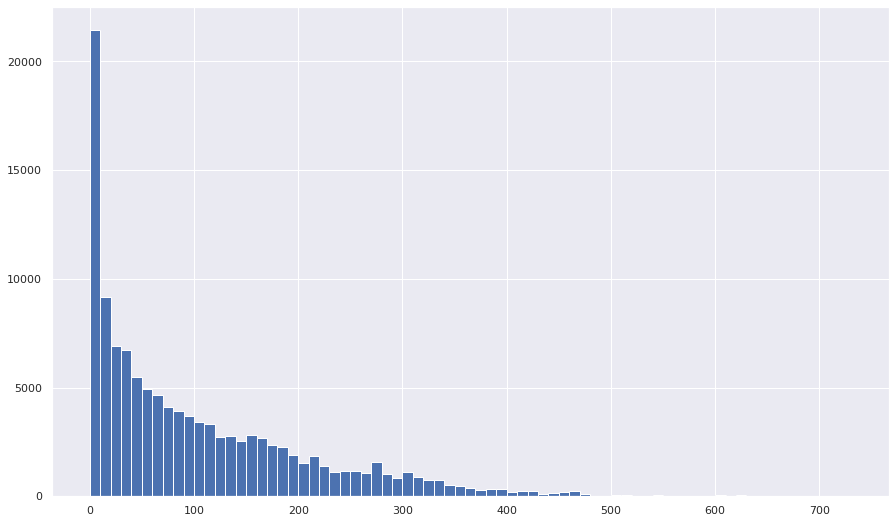

In [504]:
bin_des = np.array(range(df.lead_time.min(), df.lead_time.max(), 10))
plt.hist(df.lead_time, bins=bin_des)

Подтверждено, однако, не смотря на то, что в среднем это так, последняя гистограмма дает понять, что значительное количество бронирований оформляется за 10-20 дней до заезда

### Гипотеза 4: отменяется не менее 40% бронирований

In [390]:
df[df['is_canceled']==True].is_canceled.count()/df.is_canceled.count()*100


37.041628277075134

Практически верно

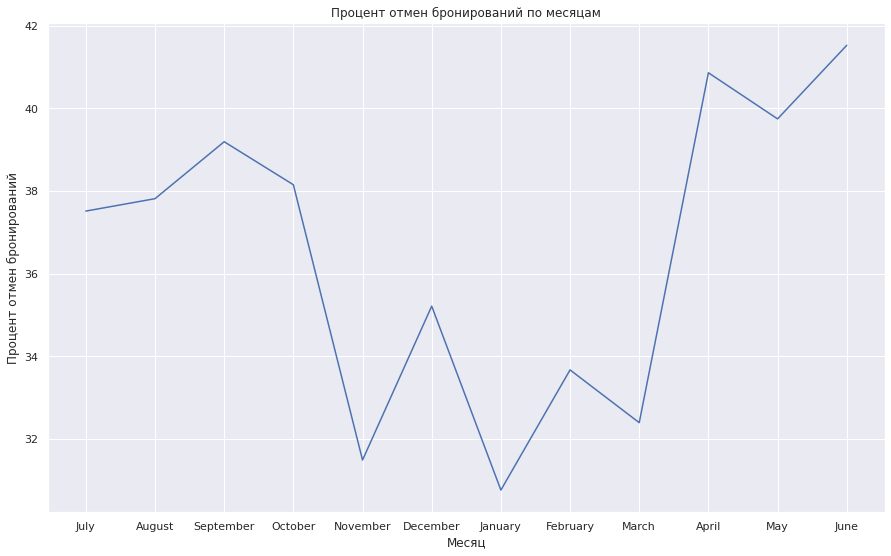

In [503]:
temp = df.arrival_date_month.unique() # список всех месяцев в таблице
df_temp = df.loc[df['is_canceled']==True]
arr = [df_temp[df_temp['arrival_date_month']==x].hotel.count()/df[df['arrival_date_month']==x].hotel.count()*100 for x in temp] # список с подсчитанным количеством отмен бронирований в определенный месяц

plt.figure(figsize=(15, 9)) # подбираем размер графика
plt.ylabel("Процент отмен бронирований") # название вертикальной оси
plt.xlabel("Месяц") # название горизонтальной оси
plt.title("Процент отмен бронирований по месяцам") # название графика
plt.plot(temp, arr) # сроим график по спискам выше

### Гипотеза 5: те, кто бронируют паркинг, часто приезжают вчетвером, и никогда не более, чем впятером

<AxesSubplot:>

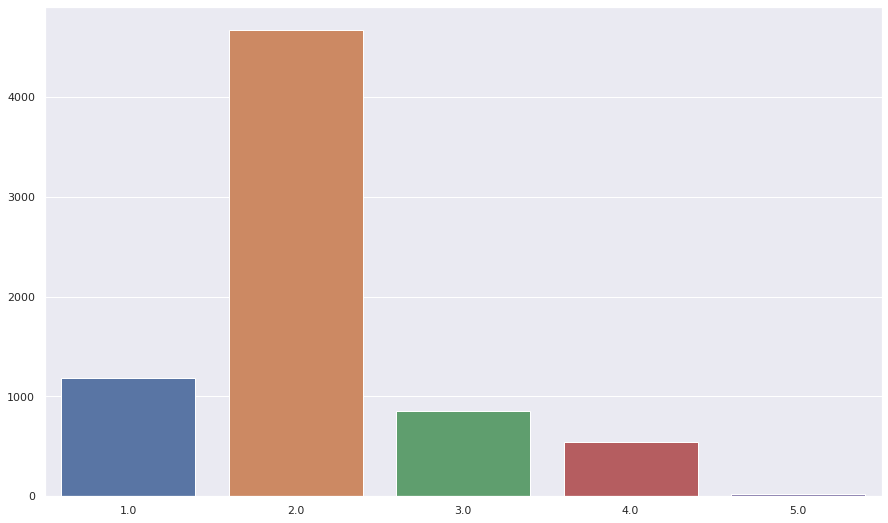

In [502]:
df_temp = df.loc[df['required_car_parking_spaces']==1]
temp = pd.Series(df_temp['adults']+df_temp['children']+df_temp['babies']).unique()
arr = [df_temp[(df_temp['adults']+df_temp['children']+df_temp['babies'])==x].hotel.count() for x in temp] # список с подсчитанным количеством отмен бронирований в определенный месяц


sns.barplot(x=temp, y=arr)

Частично опровергнуто: Действительно, на одной машине не приезжают более, чем пять человек, однако среднее и самое популярное значения далеки от 4

### Гипотеза 6: те, кто бронируют паркинг, обычно приезжают не более чем на одну ночь

<AxesSubplot:ylabel='required_car_parking_spaces'>

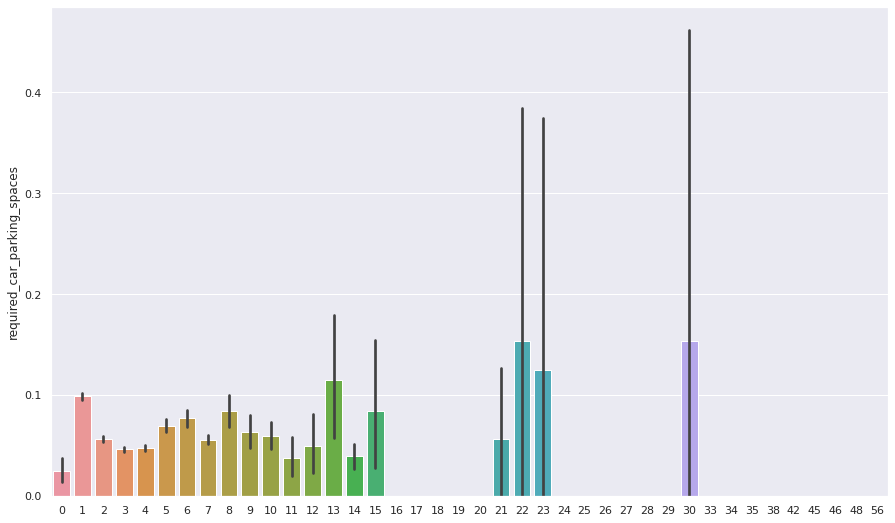

In [501]:
sns.barplot(y=df['required_car_parking_spaces'], x=(df['stays_in_weekend_nights']+df['stays_in_week_nights']))

Опровергнуто

## 6.	Итоговые результаты и выводы

В этой работе мы рассмотрели 6 гипотез, однако подтвердились и могут быть полезными для бизнеса в сфере отелей следующие три:

### 1. Пиковые сезоны приходятся на лето

Зачастую отелям важно понимать, в какие месяцы количество бронирований достигнет своего пика, поэтому были созданы следующие визуализации:

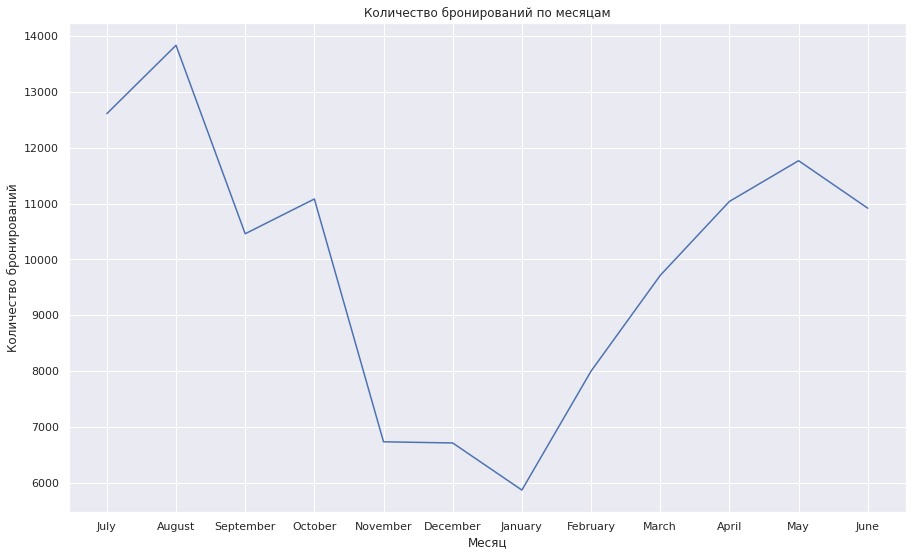

In [500]:
temp = df.arrival_date_month.unique() # список всех месяцев в таблице
arr = [df[df['arrival_date_month']==x].hotel.count() for x in temp] # список с подсчитанным количеством бронирований в определенный месяц

plt.ylabel("Количество бронирований") # название вертикальной оси
plt.xlabel("Месяц") # название горизонтальной оси
plt.title("Количество бронирований по месяцам") # название графика
plt.plot(temp, arr) # сроим график по спискам выше

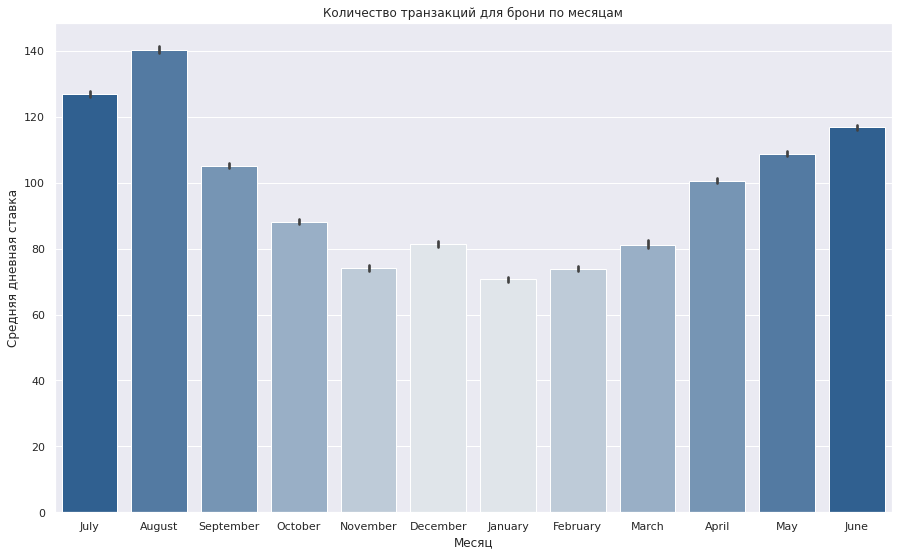

In [499]:
palet = sns.diverging_palette(250, 250, n=12, s=90, l=40) # подбираем цвета гистограммы
fig = sns.barplot(x='arrival_date_month', y='adr', palette=palet, data=df) # гистограмма с тем же смыслом, но использующая параметр adr, указанный в бд
plt.xlabel("Месяц") # название горизонтальной оси
plt.ylabel("Средняя дневная ставка") # название вертикальной оси
plt.title("Количество транзакций для брони по месяцам") # название гистограммы
plt.show(fig) # показываем гистограмму

Как мы можем заметить, самыми популярными для отдыха месяцами являются август и июль, в то время как в январе спрос падает до рекордно низких значений. Опираясь на эту статистику, отели могут выстраивать стратегии работы в течение года.

### 2. В среднем отменяется около 40% бронирований, и процент отмены зависит от месяца

При бронировании отелей на сайте часто выводится заполненность отеля, однако основываясь на всех бронированиях, фактическая заполненность будет заметно ниже, так как большой процент бронирований отменяются. Для того, чтобы нивеллировать данную погрешность, необходимо выяснить, какой процент бронирований в целом (и в каждом месяце по отдельности) отменяется, и, следовательно, выводить на сайте заполненность отеля с данной поправкой.

In [497]:
ans = round(df.is_canceled.mean()*100)
print("Средний процент отмены бронирований за весь год -", ans, '%')

Средний процент отмены бронирований за весь год - 37 %


Однако, в разное время отменяется разный процент бронирований. Для того, чтобы это учесть, построим график:

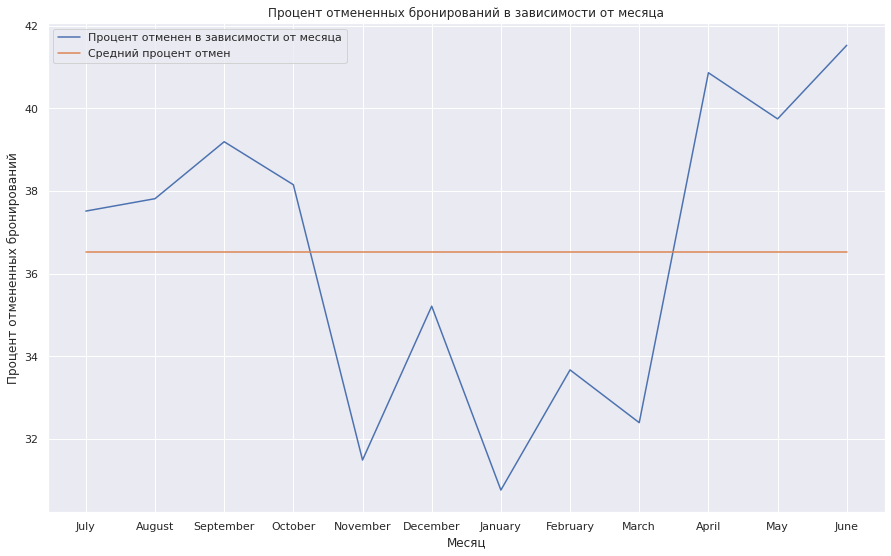

In [498]:
temp = df.arrival_date_month.unique() # список всех месяцев в таблице
df_temp = df.loc[df['is_canceled']==True] # копия датафрейма исключительно с отмененными бронированиями
arr = [df_temp[df_temp['arrival_date_month']==x].hotel.count()/df[df['arrival_date_month']==x].hotel.count()*100 for x in temp] 
# список с подсчитанным количеством отмен бронирований в определенный месяц

plt.ylabel("Процент отмененных бронирований") # название вертикальной оси
plt.xlabel("Месяц") # название горизонтальной оси
plt.title("Процент отмененных бронирований в зависимости от месяца") # название графика
plt.plot(temp, arr) # сроим график по спискам выше
plt.plot(temp, [mean(arr)]*12) # сроим график среднего значения
plt.legend(["Процент отменен в зависимости от месяца", "Средний процент отмен"])

Как можно заметить, процент отмененных бронирований достигает своего пикового значения в июле и минимального в январе. Это значит, что в эти месяцы требуются особые поправки к ожидаемой заполняемости отеля

### 3. Те, кто бронируют паркинг, часто приезжают вчетвером, и никогда не более, чем впятером

При постройке отеля необходимо рассчитывать количество парковочных мест исходя из вместимости отеля. Для этого стоит понимать, как часто людям требуется парковочное место, и, если требуется, сколько человек обычно приезжают на одном автомобиле. Гипотеза была такова: так как большинство автомобилей вмещают 4-5 человек, большинство автовладельцев приезжают именно компаниями по 4-5 человек.

In [496]:
ans = round(df[df['required_car_parking_spaces']!=0].required_car_parking_spaces.count()/df.required_car_parking_spaces.count()*100)
# в этой строке некорректно было бы использовать mean(), так как нас интересует именно кол-во бронирований с машинами, а не 
# кол-во машин, забронированных в целом
print("Средний процент бронирований с требованием парковочного места -", ans, '%')

Средний процент бронирований с требованием парковочного места - 6 %


Из этого мы можем увидеть, что в среднем при 6% бронирований потребуются парковочные места. 

Однако, в одном бронировании может быть запрошено множество парковочных мест. Чтобы исключить риск неверной оценки, докажем, что большинство приезжает не более, чем на одной машине:

In [495]:
df_temp = df.loc[df['required_car_parking_spaces']!=0] # копия датафрейма исключительно с бронированиями с парковочными местами
ans = df_temp.required_car_parking_spaces.mean()
print("Среднее кол-во машин на одно бронирование -", ans)

Среднее кол-во машин на одно бронирование - 1.0065726413802547


Как мы видим, в подавляющем большинстве бронирований присутствует запрос на одно парковочное место.

Однако назревает вопрос - на каждое парковочное место приходится разное число постояльцев. На какое количество комнат нужно рассчитывать парковку?

Для ответа рассчитаем среднее количество людей на одно парковочное место и построим гистограмму, отображающую кол-во людей в одной машине.

In [494]:
df_temp = df.loc[df['required_car_parking_spaces']==1]

ans = (df_temp['adults']+ df_temp['children']+ df_temp['babies']).mean()
print("Среднее количество людей на одно парковочное место -", ans)

Среднее количество людей на одно парковочное место - 2.1126547455295737


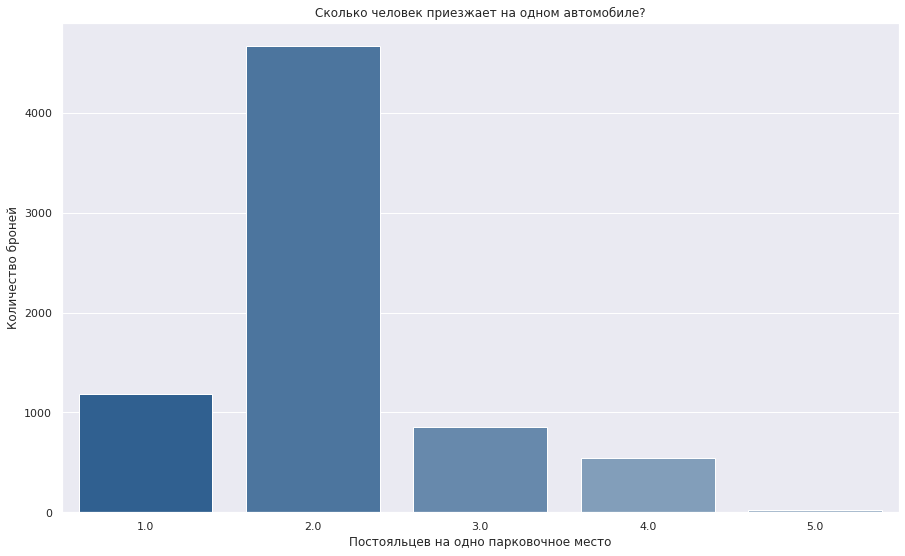

In [493]:
df_temp = df.loc[df['required_car_parking_spaces']==1] # копия датафрейма исключительно с бронированиями с одним парковочным местом
temp = pd.Series(df_temp['adults']+df_temp['children']+df_temp['babies']).unique() # список всех уникальных значений кол-ва людей
arr = [df_temp[(df_temp['adults']+df_temp['children']+df_temp['babies'])==x].hotel.count() for x in temp] 
# список с подсчитанным количеством броней с одним парковочным местом для каждого уникального числа постояльцев

palet = sns.diverging_palette(250, 250, n=15, s=90, l=40) # подбираем цвета гистограммы
fig = sns.barplot(x=temp, y=arr, palette=palet)
plt.xlabel("Постояльцев на одно парковочное место") # название горизонтальной оси
plt.ylabel("Количество броней") # название вертикальной оси
plt.title("Сколько человек приезжает на одном автомобиле?") # название гистограммы
plt.show(fig) # показываем гистограмму

Исходя из этих данных владельцы отелей могут понимать, на какое количество каких комнат стоит рассчитывать размер парковки у отеля.

Кроме того, легко увидеть, что изначальная гипотеза, утверждавшая, что на одно парковочное место постоляьцы приезжают группами по 4-5, не подтвердилась.

## Выводы

Мы детально рассмотрели три гипотезы:

1. #### Пиковые сезоны приходятся на лето - Подтверждено.
Наибольшая загруженность отелей достигается в июле и августе. Исходя из этого владельцам отелей следует выстраивать график отпусков, распределять нагрузку на сотрудников, планировать ремонтные работы и рассчитывать ресурсы отеля.

2. #### В среднем отменяется около 40% бронирований, и процент отмены зависит от месяца - Подтверждено частично. 
В среднем отменяется 37% броней и, действиельно, процент варьиркется в зависимости от сезона - в январе и ноябре отменяются не более 32%. Исходя из этих данных стоит рассчитывать фактическую заполненность отеля в данные конкретные месяцы

3. #### Те, кто бронируют паркинг, часто приезжают вчетвером, и никогда не более, чем впятером - Частично опровергнуто. 
Куда чаще постояльцы приезжают на личном автомобиле вдвоем. Однако, действительно, никогда не более, чем впятером. Дополнительно мы рассмотрели средние значения количества броней с запросом на парковочные места, среднее количество автомобилей на одну бронь. Совокупность этих статистических данных может помочь при рассчете количества парковочных мест во владении отеля.